In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

# Make sure that caffe is on the python path:
caffe_root = '../' # Expected to be in rank_scripts/

import sys
sys.path.insert(0, caffe_root + 'python')

import caffe

plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

import os

In [54]:
caffe.set_device(0)
caffe.set_mode_gpu()
net = caffe.Net(caffe_root +  'rank_scripts/multi/deploy_multinet.prototxt',
                caffe_root + 'rank_scripts/models103/_iter_500.caffemodel',
                caffe.TEST)# input preprocessing: 'data'is the name of the input blob == net.inputs[0]
transformer = caffe.io.Transformer({'data': net.blobs['data'].data.shape})
transformer.set_transpose('data', (2,0,1))
transformer.set_raw_scale('data', 255)  # the reference model operates on images in [0,255] range instead of [0,1]
transformer.set_channel_swap('data', (2,1,0))  # the reference model has channels in BGR order instead of RGB

In [3]:
# set net to batch size
net.blobs['data'].reshape(50,3,227,227)

[-19.1309433  -10.4714365  -18.53964615 ..., -10.35270214 -18.48515701
  -4.22154856]


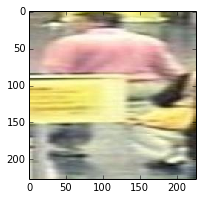

In [84]:
#query_image_path = '/home/jayant/caffe-Person-ReID_triplet/rank_scripts/images_market/0004_c1s6_016996_00.jpg'
query_image_path = '/home/jayant/vision/PETA/i-LID_alex/archive/0002_004.jpg'
query_image = caffe.io.load_image(query_image_path)
net.blobs['data'].data[...] = transformer.preprocess('data', query_image)
out = net.forward()
vector_query = out['fc7'][0]
plt.figure(figsize=(3,3))
plt.imshow(query_image)
print vector_query

In [53]:
print net.blobs['data'].data[...][0][2][222][127]

102.0


In [61]:
print net.blobs['fc6'].data[...][0]

[-0. -0. -0. ..., -0. -0. -0.]


In [7]:
print query_image[255][127][0]*255

181.000004411


In [25]:
#print net.blobs['conv3'].data[...][0]

In [12]:
#rint net.blobs['conv3'].data[...][0]

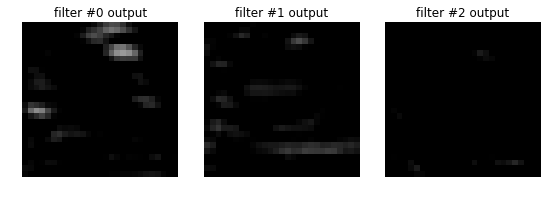

In [26]:
# helper show filter outputs
def show_filters(net):
    net.forward()
    plt.figure()
    filt_min, filt_max = net.blobs['conv2'].data.min(), net.blobs['conv2'].data.max()
    for i in range(3):
        plt.subplot(1,4,i+2)
        plt.title("filter #{} output".format(i))
        plt.imshow(net.blobs['conv2'].data[0, i], vmin=filt_min, vmax=filt_max)
        plt.tight_layout()
        plt.axis('off')

# filter the image with initial 
show_filters(net)

In [58]:
print out['fc8_a'][0]

[-16.82548332 -20.31431007 -11.11739826  -4.25531721  -8.91171551
 -20.16871834  15.13965034  -0.45816416 -10.75170326 -15.796772
  -4.61120462 -18.66605186  -9.59460258 -19.04129028 -23.38176727
  -0.39965332  -4.54794836  -5.68246841 -20.46725655 -18.41586113
 -19.87213135 -20.43888283 -13.18058872 -13.91458416 -18.46295166
  -5.46317244 -12.98907948 -18.09486198 -10.99631786 -17.61483955
 -16.4764328   13.34078026   4.58439827 -17.27895546 -10.21301556
 -11.38258934 -18.94767189 -12.38544369 -13.44285774 -11.054883
 -18.49178505  -0.76304114 -10.50294304  -4.08592033 -12.26174545
 -21.54723358 -12.11412525 -19.62612152 -13.54618073 -21.29644394
  -9.55790234  -5.95296955  -3.75588179  11.65660572 -20.05335808
 -13.0979023  -13.27353096  -4.99230576   4.12454224 -14.18833351
 -18.53443527 -12.1725893  -13.0469923    3.60011816 -14.70721054
 -17.8368454   -8.4353857   -7.99757004  -7.61885929 -19.01013947
  -6.77076721 -17.48033714   2.00380802 -10.68162727 -10.77704811
  -8.76603508 